## Customer Churn Prediction:
My Kaggle competition submission scored 0.87 AUC. See the competition page [here](https://www.kaggle.com/competitions/advanced-dls-spring-2021) for details.

***Task:** You will need to learn how to model customer churn for a telecom company. This task is highly practical, and the algorithms used to solve it are actively employed by real telecom companies. If we know a customer is likely to leave, we can try to retain them by offering incentives such as bonuses.*

*On the data page, you can download two files:*

* **train.csv** (contains feature columns and the target variable)
* **test.csv** (contains only feature columns)

*Your task is to submit predictions (churn probabilities) for the **test.csv** file. An example of the submission file is **submission.csv**.*

## Step 1. Loading and Exploring Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [3]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [4]:
test_data = pd.read_csv('./test.csv')
submission_data = pd.read_csv('./submission.csv')
test_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [5]:
# Numerial features
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Categorical features
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
print("Sum of duplicates:", data.duplicated().sum())

Sum of duplicates: 14


In [7]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

<Axes: >

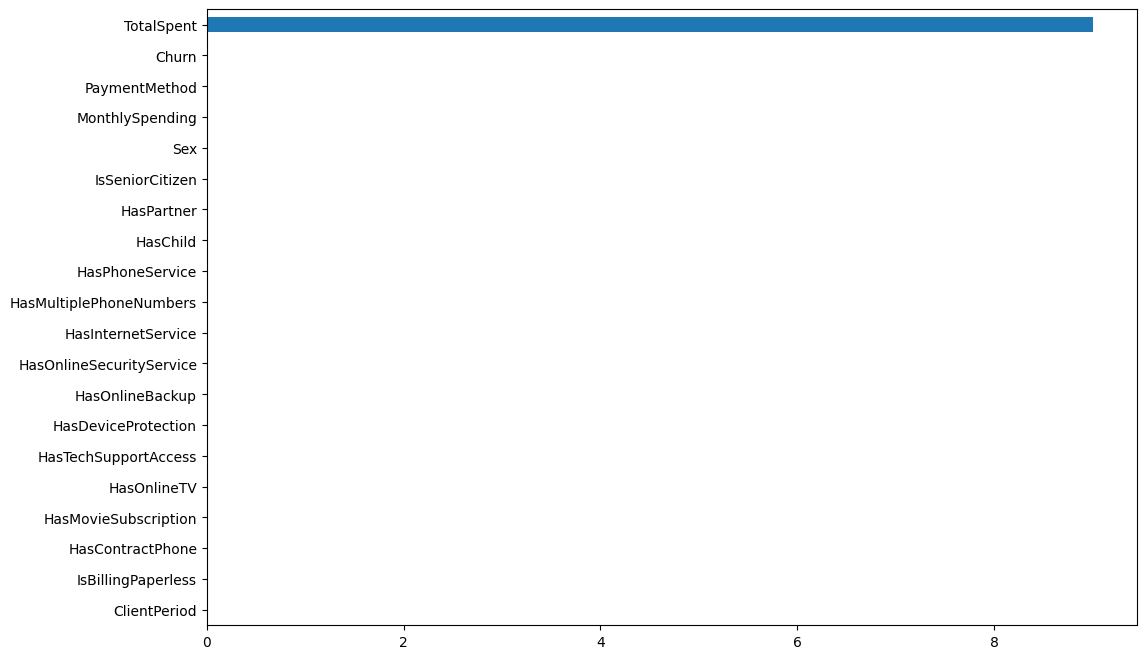

In [9]:
# Draw NaN sum dataframe
data.replace(' ', np.nan, inplace=True)
test_data.replace(' ', np.nan, inplace=True)
pd.DataFrame(data.isna().sum(), columns = ['NaN Count']) \
    .sort_values('NaN Count') \
    .plot(kind='barh', legend=False, figsize=(12,8))

In [10]:
print('N of empty space in TotalSpent:', len(data[data['TotalSpent'] == ' ']))

N of empty space in TotalSpent: 0


In [11]:
# Replace empty spaces in TotalSpent with 0
# Convert from object to float type
data['TotalSpent'] = data.TotalSpent.fillna(0).astype('float')

## Step 2. Data analysis

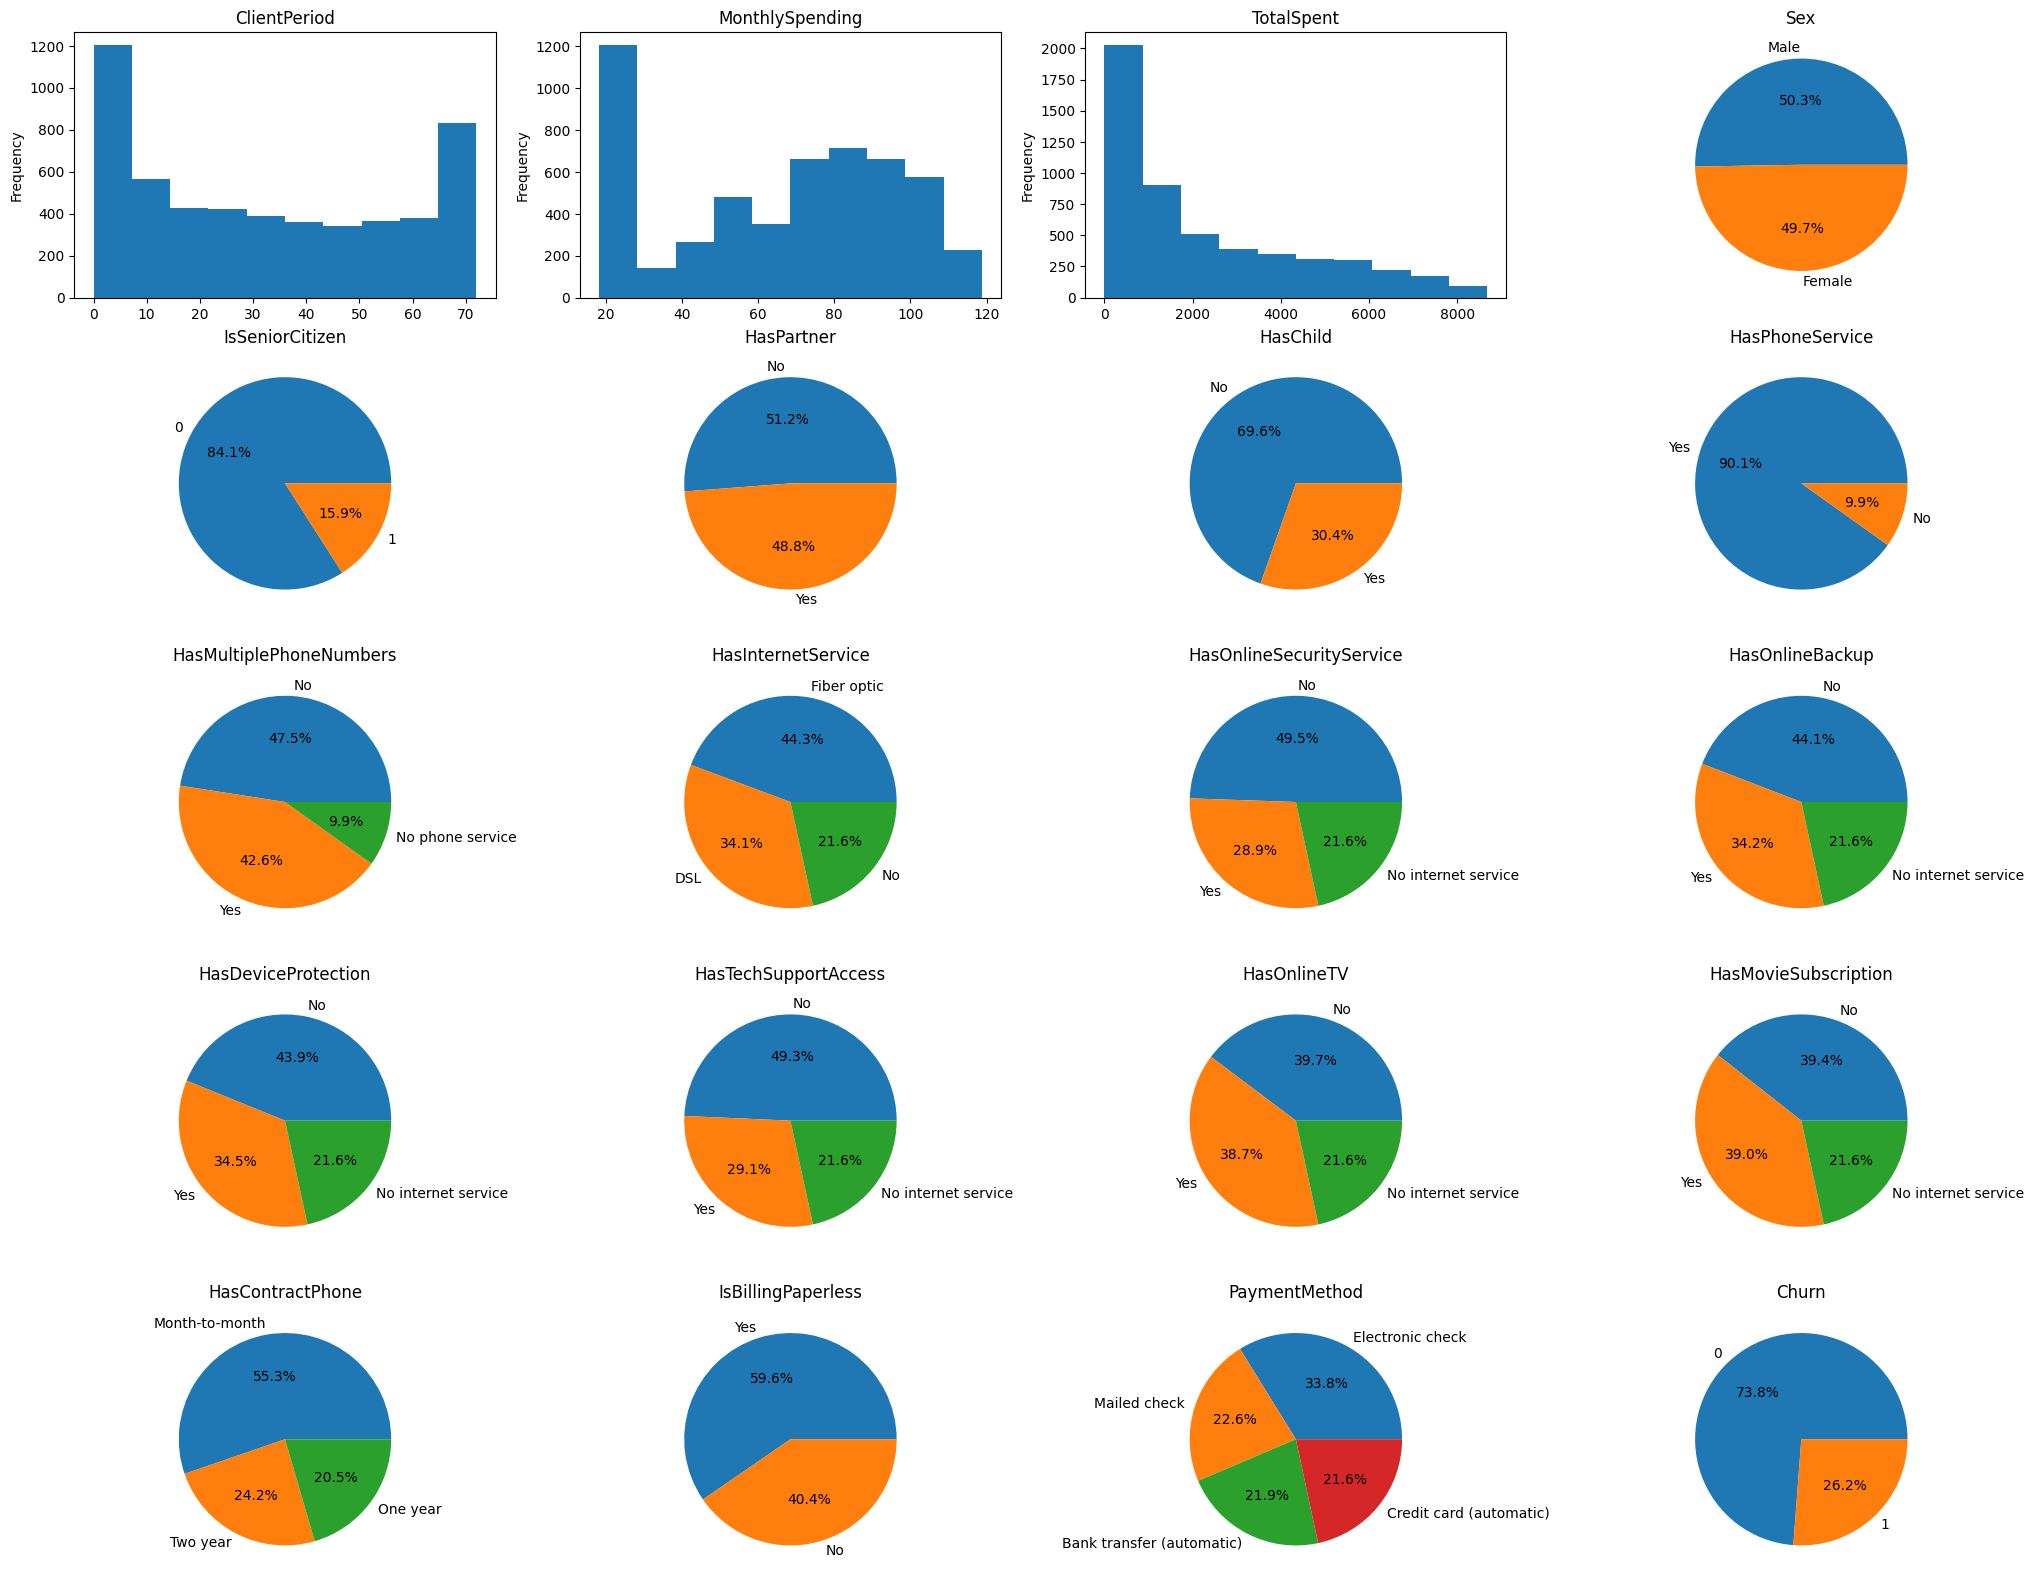

In [12]:
fix, axes = plt.subplots(5 ,4, figsize=(25,20))
for ax, col in zip(axes.flatten(), data.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(data[col].value_counts(), autopct='%1.1f%%', labels=data[col].value_counts().index)
    else:
        data[col].plot(kind='hist', ec='black', ax=ax)

## Step 3. Data modelling

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [14]:
X = data.drop(columns=[target_col], axis=1)
Y = data[target_col]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ohc", OneHotEncoder(), cat_cols)
])

pipe = Pipeline([
    ("preprocess", preprocess),
    ("LogReg", LogisticRegression())
])

In [17]:
params = {'LogReg__C': [100, 10, 1, 0.1, 0.01, 0.001]}

In [18]:
CV_model = GridSearchCV(estimator=pipe, param_grid=params, scoring='roc_auc', refit=True, n_jobs=1, cv=5)
CV_model.fit(X_train, y_train)
print("Best parameters:", CV_model.best_params_)
print("Best score:", CV_model.best_score_)

Best parameters: {'LogReg__C': 100}
Best score: 0.848824767995163


Best parameters: {'LogReg__C': 100}
Best score: 0.848824767995163

## Step 4. Gradient boosting

In [19]:
import catboost
from catboost import CatBoostClassifier, cv
from sklearn.metrics import roc_auc_score, roc_curve

X_train, X_test, _, _ = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
catboost = CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=42,
)

PARAMS = {
    "n_estimators": [100],
    "learning_rate": [0.2],
    "max_depth": [4],
    "l2_leaf_reg": [50],
    "subsample": [0.7],
    "random_strength": [0.1], 
    "min_data_in_leaf": [150],
}
catboost.grid_search(PARAMS, X_train, y_train, cv=5, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8450440	best: 0.8450440 (0)	total: 1.01s	remaining: 0us
Estimating final quality...


{'params': {'subsample': 0.7,
  'min_data_in_leaf': 150,
  'random_strength': 0.1,
  'depth': 4,
  'learning_rate': 0.2,
  'l2_leaf_reg': 50,
  'iterations': 100},
 'cv_results': defaultdict(list,
             {'iterations': [0, 99],
              'test-AUC-mean': [0.7937512079148348, 0.8451612235034116],
              'test-AUC-std': [0.024252147811452143, 0.00946781761159107],
              'train-AUC-mean': [0.8088559710995561, 0.8854056090137428],
              'train-AUC-std': [0.008099854400749793, 0.0019208482104466549],
              'test-Logloss-mean': [0.5932093243717192, 0.415270639916505],
              'test-Logloss-std': [0.002189329063677644, 0.011389746975466283],
              'train-Logloss-mean': [0.5892918545826759, 0.36578807737639346],
              'train-Logloss-std': [0.0033584335919946235,
               0.002439008515973649]})}

In [21]:
best_score = catboost.best_score_
print("Best score:", best_score)
best_params = catboost.get_params()
for p in ("cat_features", "logging_level", "eval_metric"):
    best_params.pop(p)
print("Best params:", best_params)

Best score: {'learn': {'Logloss': 0.38384634400016554, 'AUC': 0.8714556179329049}}
Best params: {'random_seed': 42, 'metric_period': 1000, 'grow_policy': 'Lossguide', 'subsample': 0.7, 'min_data_in_leaf': 150, 'random_strength': 0.1, 'depth': 4, 'learning_rate': 0.2, 'l2_leaf_reg': 50, 'iterations': 100}


# Best quality:

'AUC': 0.8714556179329049,
  'subsample': 0.5,
  'min_data_in_leaf': 10,
  'random_strength': 5,
  'depth': 4,
  'learning_rate': 0.2,
  'l2_leaf_reg': 10,
  'iterations': 100.

# Step 5. Prediction

In [22]:
best_model = catboost

In [23]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1] # extract probabilities for the positive class (class 1 in binary classification, churn=1) i.e. 'the client will leave' 
submission.to_csv('./my_submission.csv')